In [1]:
from fast_rl.core.basic_train import AgentLearner
from fast_rl.agents.dqn import *
from fast_rl.agents.dqn_models import *
from fast_rl.core.train import AgentInterpretation, GroupAgentInterpretation
from fast_rl.core.data_block import MDPDataBunch
from fast_rl.core.agent_core import ExperienceReplay, GreedyEpsilon
from fastai.basic_data import DatasetType
from fast_rl.core.metrics import *
from fastai.gen_doc.nbdoc import *

Can't import one of these: No module named 'pybullet'
Can't import one of these: No module named 'gym_maze'
Can't import one of these: No module named 'gym_minigrid'


In [2]:
show_doc(DuelingDQNModule.__init__)

<h4 id="DuelingDQNModule.__init__" class="doc_header"><code>__init__</code><a class="source_link" data-toggle="collapse" data-target="#DuelingDQNModule-__init__-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>__init__</code>(**\*\*`kwargs`**)

<div class="collapse" id="DuelingDQNModule-__init__-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#DuelingDQNModule-__init__-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>__init__</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Basic DQN Module. Args:
        ni: Number of inputs. Expecting a flat state `[1 x ni]`
        ao: Number of actions to output.
        layers: Number of layers where is determined per element.
        n_conv_blocks: If `n_conv_blocks` is not 0, then convolutional blocks will be added
                                   to the head on top of existing linear layers.
        nc: Number of channels that will be expected by the convolutional blocks. 

In [3]:
show_doc(DuelingBlock.forward)

<h4 id="DuelingBlock.forward" class="doc_header"><code>forward</code><a class="source_link" data-toggle="collapse" data-target="#DuelingBlock-forward-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>forward</code>(**`xi`**)

<div class="collapse" id="DuelingBlock-forward-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#DuelingBlock-forward-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>forward</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Splits the base neural net output into 2 streams to evaluate the advantage and v of the s space and corresponding actions.

.. math::
   Q(s,a;\; \Theta, \\alpha, \\beta) = V(s;\; \Theta, \\beta) + A(s, a;\; \Theta, \\alpha) - \\frac{1}{|A|}
   \\Big\\sum_{a'} A(s, a';\; \Theta, \\alpha) 

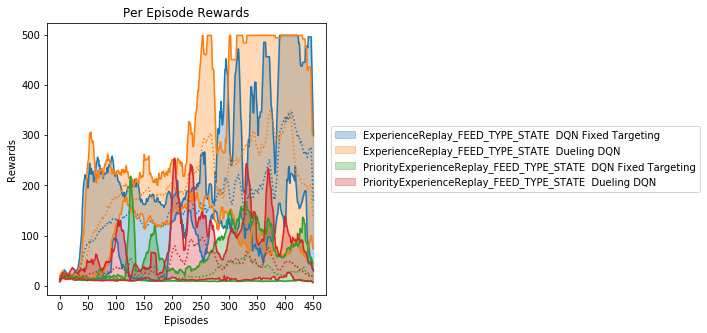

In [4]:
import os
model_dirs = ['data/cartpole_dqn fixed targeting', 'data/cartpole_dueling dqn']
group_interp = GroupAgentInterpretation()
for model_dir in model_dirs:
    for file in os.listdir(model_dir):
        file = file.replace('.pickle', '')
        group_interp.add_interpretation(GroupAgentInterpretation.from_pickle(model_dir, file))
group_interp.plot_reward_bounds(per_episode=True, smooth_groups=10, show_average=True, hide_edges=False)

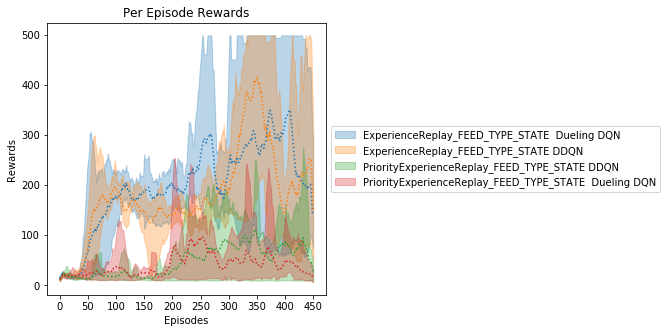

In [5]:
model_dirs = ['data/cartpole_dueling dqn', 'data/cartpole_ddqn']
group_interp_2 = GroupAgentInterpretation()
for model_dir in model_dirs:
    for file in os.listdir(model_dir):
        file = file.replace('.pickle', '')
        group_interp_2.add_interpretation(GroupAgentInterpretation.from_pickle(model_dir, file))
group_interp_2.plot_reward_bounds(per_episode=True, smooth_groups=10, show_average=True, hide_edges=True)
group_interp.add_interpretation(group_interp_2)

In [6]:
group_interp.analysis

,name,average,max,min,type
0,"(DQN Fixed Targeting, PriorityExperienceReplay...",29.125333,81.6,7.2,reward
1,"(DQN Fixed Targeting, PriorityExperienceReplay...",52.764745,166.8,9.6,reward
2,"(DQN Fixed Targeting, PriorityExperienceReplay...",16.286918,47.8,5.9,reward
3,"(DQN Fixed Targeting, PriorityExperienceReplay...",16.516186,119.8,8.3,reward
4,"(DQN Fixed Targeting, PriorityExperienceReplay...",16.339468,218.5,8.4,reward
5,"(DQN Fixed Targeting, ExperienceReplay_FEED_TY...",148.154989,499.0,10.6,reward
6,"(DQN Fixed Targeting, ExperienceReplay_FEED_TY...",141.317738,285.8,14.1,reward
7,"(DQN Fixed Targeting, ExperienceReplay_FEED_TY...",229.873836,496.0,9.8,reward
8,"(DQN Fixed Targeting, ExperienceReplay_FEED_TY...",149.444346,483.9,13.5,reward
9,"(DQN Fixed Targeting, ExperienceReplay_FEED_TY...",137.559645,499.0,10.4,reward


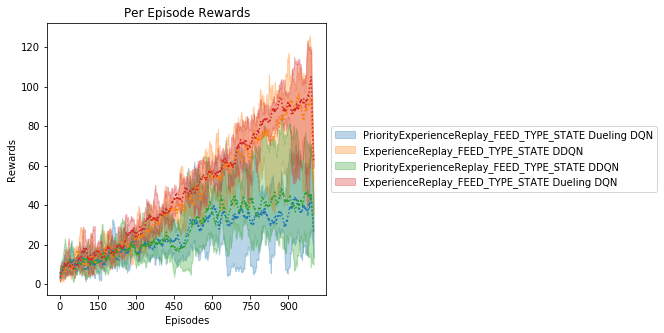

In [8]:
model_dirs = ['data/lunarlander_dueling dqn', 'data/lunarlander_ddqn']
group_interp_2 = GroupAgentInterpretation()
for model_dir in model_dirs:
    for file in os.listdir(model_dir):
        file = file.replace('.pickle', '')
        group_interp_2.add_interpretation(GroupAgentInterpretation.from_pickle(model_dir, file))
group_interp_2.plot_reward_bounds(per_episode=True, show_average=True, hide_edges=True,smooth_groups=20)
group_interp.add_interpretation(group_interp_2)